In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# customer churn dataset
df = pd.read_csv(r'/content/drive/MyDrive/BayesianProject2/Customer Churn.csv')
print(df)

      Call Failure  Complains  Subscription Length  Charge Amount  \
0                8          0                   38              0   
1                0          0                   39              0   
2               10          0                   37              0   
3               10          0                   38              0   
4                3          0                   38              0   
...            ...        ...                  ...            ...   
3145            21          0                   19              2   
3146            17          0                   17              1   
3147            13          0                   18              4   
3148             7          0                   11              2   
3149             8          1                   11              2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5             

In [ ]:
# customer churn dataset
df_selected = df[['Call Failure','Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Status', 'Customer Value']]

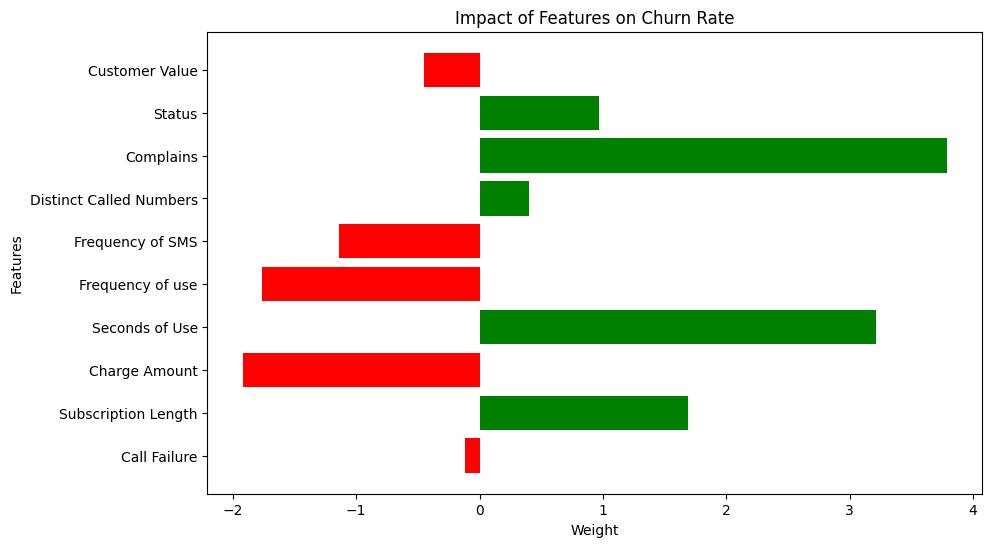

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Create data for the bar chart
features = ['Call Failure', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 
            'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 
            'Complains', 'Status', 'Customer Value']

weights = [-0.12, 1.69, -1.92, 3.21, -1.76, -1.14, 0.40, 3.79, 0.97, -0.45]

colors = ['red' if w < 0 else 'green' for w in weights]

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(features, weights, color=colors)

# Add labels and title
ax.set_xlabel('Weight')
ax.set_ylabel('Features')
ax.set_title('Impact of Features on Churn Rate')

# Display the chart
plt.show()
plt.savefig('feature_impact.png')

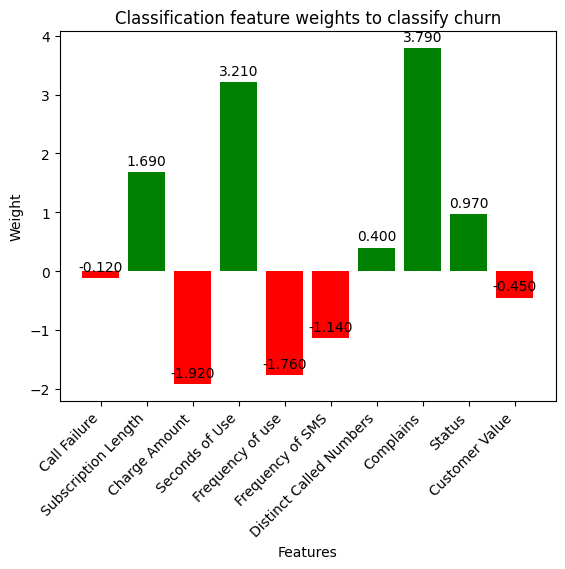

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Create data for the bar chart

weights = {'Call Failure': -0.12, 'Subscription Length': 1.69, 'Charge Amount': -1.92, 'Seconds of Use': 3.21, 
           'Frequency of use': -1.76, 'Frequency of SMS': -1.14, 'Distinct Called Numbers': 0.40, 'Complains':3.79, 'Status':0.97, 'Customer Value':-0.45 }

colors = ['red' if w < 0 else 'green' for w in weights.values()]

fig, ax = plt.subplots()

# Create a bar plot with custom colors
bars = ax.bar(weights.keys(), weights.values(), color=colors)

# Set x-axis labels at 45 degree angle
plt.xticks(rotation=45, ha='right')

# Add exact weight value on the top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
                
# Add title and labels to the plot
plt.title("Classification feature weights to classify churn")
plt.xlabel("Features")
plt.ylabel("Weight")

# Display the plot
plt.show()

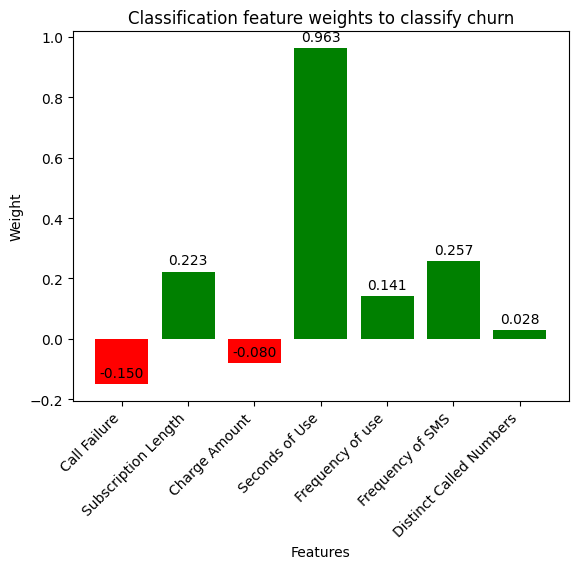

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

weights = {'Call Failure': -0.15, 'Subscription Length': 0.223, 'Charge Amount': -0.08, 'Seconds of Use': 0.963, 
           'Frequency of use': 0.141, 'Frequency of SMS': 0.257, 'Distinct Called Numbers': 0.028}

# Create a list of colors for positive and negative weights
colors = ['red' if w < 0 else 'green' for w in weights.values()]

fig, ax = plt.subplots()

# Create a bar plot with custom colors
bars = ax.bar(weights.keys(), weights.values(), color=colors)

# Set x-axis labels at 45 degree angle
plt.xticks(rotation=45, ha='right')

# Add exact weight value on the top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
                
# Add title and labels to the plot
plt.title("Classification feature weights to classify churn")
plt.xlabel("Features")
plt.ylabel("Weight")

# Display the plot
plt.show()


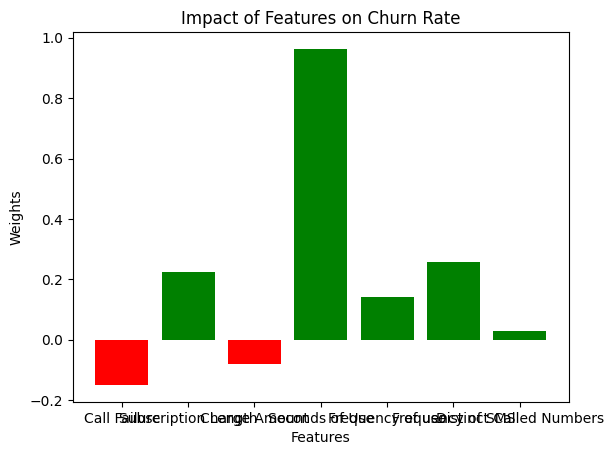

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the features and their weights
features = ['Call Failure', 'Subscription Length', 'Charge Amount', 
            'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 
            'Distinct Called Numbers']
weights = [-0.15, 0.223, -0.08, 0.963, 0.141, 0.257, 0.028]

# Define the colors for positive and negative weights
colors = ['red' if w < 0 else 'green' for w in weights]

# Create the bar chart
plt.bar(features, weights, color=colors)

# Set the title and labels
plt.title('Impact of Features on Churn Rate')
plt.xlabel('Features')
plt.ylabel('Weights')

# Show the chart
plt.show()


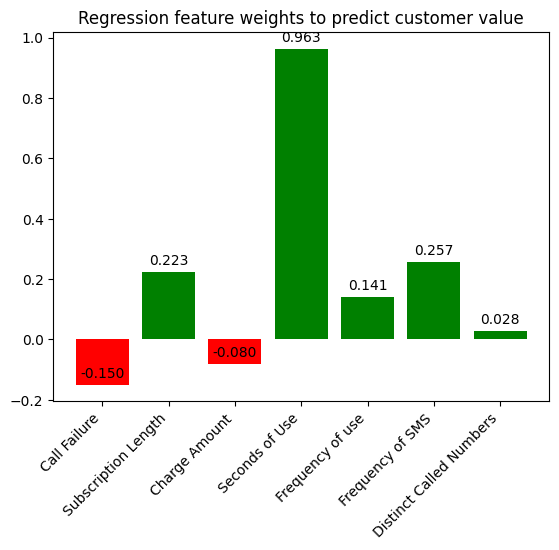

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

weights = {'Call Failure': -0.15, 'Subscription Length': 0.223, 'Charge Amount': -0.08, 'Seconds of Use': 0.963, 
           'Frequency of use': 0.141, 'Frequency of SMS': 0.257, 'Distinct Called Numbers': 0.028}

# Create a list of colors for positive and negative weights
colors = ['red' if w < 0 else 'green' for w in weights.values()]

fig, ax = plt.subplots()

# Create a bar plot with custom colors
bars = ax.bar(weights.keys(), weights.values(), color=colors)

# Set x-axis labels at 45 degree angle
plt.xticks(rotation=45, ha='right')

# Add exact weight value on the top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
plt.title("Regression feature weights to predict customer value")
plt.show()


Silhouette Score: 0.5411474720908466
Calinski Harabasz Score: 1025.4471729950812
Davies Bouldin Score: 1.9460877539087762


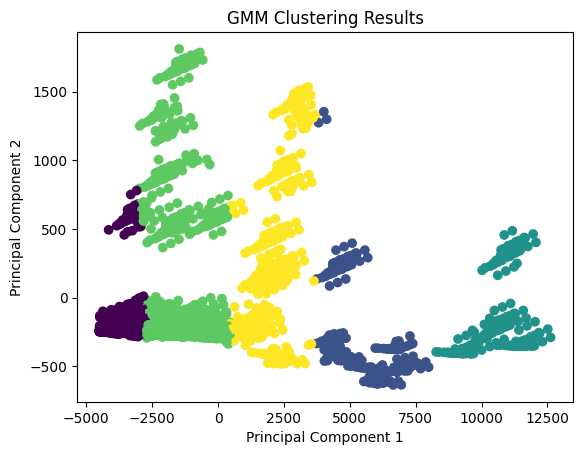

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Select features for clustering
df_selected = df[['Call Failure','Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Status', 'Customer Value']]

# Perform dimensionality reduction with PCA
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_selected)

# Initialize the GMM object with optimal parameters
gmm = GaussianMixture(n_components=5, covariance_type='spherical')
gmm.fit(df_selected)

# Predict the clusters for each data point
labels = gmm.predict(df_selected)

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_selected, labels)
print("Silhouette Score:", silhouette_avg)
ch_score = calinski_harabasz_score(df_selected_pca, labels)
db_score = davies_bouldin_score(df_selected_pca, labels)

# print the clustering performance metrics
# print('Silhouette Coefficient:', silhouette_coefficient)
print('Calinski Harabasz Score:', ch_score)
print('Davies Bouldin Score:', db_score)
# Plot the clusters
plt.scatter(df_reduced[:,0], df_reduced[:,1], c=labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Silhouette Score: 0.5411474720908466
Calinski Harabasz Score: 863.819279434571
Davies Bouldin Score: 1.2731335566290114


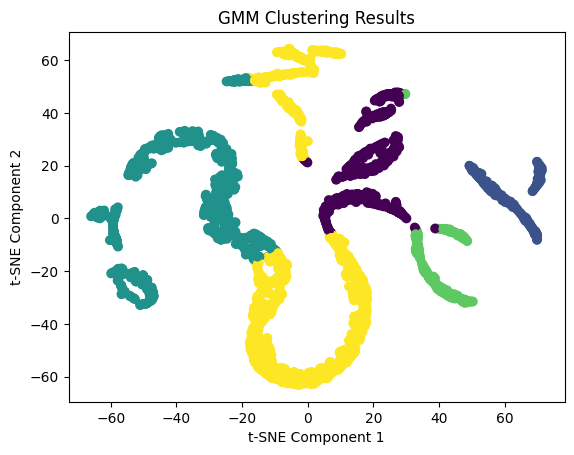

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Select features for clustering
df_selected = df[['Call Failure','Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Status', 'Customer Value']]

# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_selected)

# Initialize the GMM object with optimal parameters
gmm = GaussianMixture(n_components=5, covariance_type='spherical')
gmm.fit(df_selected)

# Predict the clusters for each data point
labels = gmm.predict(df_selected)

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_selected, labels)
print("Silhouette Score:", silhouette_avg)
ch_score = calinski_harabasz_score(df_reduced, labels)
db_score = davies_bouldin_score(df_reduced, labels)

# print the clustering performance metrics
# print('Silhouette Coefficient:', silhouette_coefficient)
print('Calinski Harabasz Score:', ch_score)
print('Davies Bouldin Score:', db_score)

# Plot the clusters
plt.scatter(df_reduced[:,0], df_reduced[:,1], c=labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


Silhouette Score: 0.5411474720908466
Calinski Harabasz Score: 749.5224411460961
Davies Bouldin Score: 1.5632188039886965


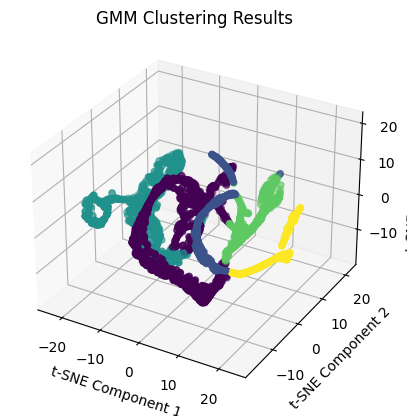

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Select features for clustering
df_selected = df[['Call Failure','Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Status', 'Customer Value']]

# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=3, random_state=100)
df_reduced = tsne.fit_transform(df_selected)

# Initialize the GMM object with optimal parameters
gmm = GaussianMixture(n_components=5, covariance_type='spherical')
gmm.fit(df_selected)

# Predict the clusters for each data point
labels = gmm.predict(df_selected)

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_selected, labels)
print("Silhouette Score:", silhouette_avg)
ch_score = calinski_harabasz_score(df_reduced, labels)
db_score = davies_bouldin_score(df_reduced, labels)

# print the clustering performance metrics
# print('Silhouette Coefficient:', silhouette_coefficient)
print('Calinski Harabasz Score:', ch_score)
print('Davies Bouldin Score:', db_score)

# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_reduced[:,0], df_reduced[:,1], df_reduced[:,2], c=labels, cmap='viridis')
ax.set_title('GMM Clustering Results')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()


Silhouette Score: 0.4552547328604052


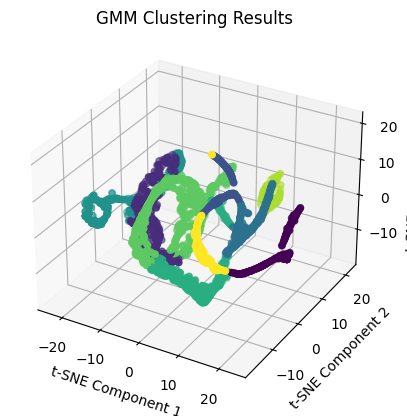

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
# Try different numbers of Gaussian components
n_components_range = range(2, 10)
bic_scores = []

# Select features for clustering
df_selected = df[['Call Failure','Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Status', 'Customer Value']]

# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=3, random_state=100)
df_reduced = tsne.fit_transform(df_selected)


for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='spherical')
    gmm.fit(df_selected)
    bic_scores.append(gmm.bic(df_selected))


# Choose the number of components that gives the lowest BIC score
optimal_n_components = n_components_range[np.argmin(bic_scores)]

# Initialize the GMM object with optimal number of components
gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='spherical')
gmm.fit(df_selected)

# Predict the clusters for each data point
labels = gmm.predict(df_selected)

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_selected, labels)
print("Silhouette Score:", silhouette_avg)
# ch_score = calinski_harabasz_score(df_reduced, labels)
# db_score = davies_bouldin_score(df_reduced, labels)

# print the clustering performance metrics
# print('Silhouette Coefficient:', silhouette_coefficient)
# print('Calinski Harabasz Score:', ch_score)
# print('Davies Bouldin Score:', db_score)

# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_reduced[:,0], df_reduced[:,1], df_reduced[:,2], c=labels, cmap='viridis')
ax.set_title('GMM Clustering Results')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()


In [ ]:
print("optimal_n_components",optimal_n_components)
print(bic_scores)

optimal_n_components 9
[497662.9173416336, 478854.588027966, 460295.69080015586, 451490.0963262102, 442549.8726545403, 439119.70160064305, 429915.3331086959, 424786.14858722844]


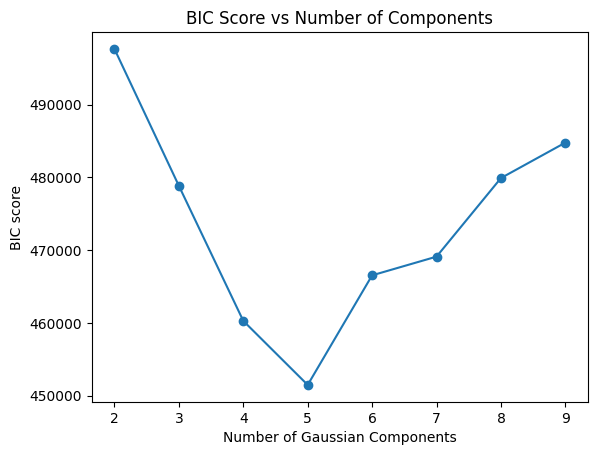

In [ ]:
bic_scores1 = [497662.9173416336, 478854.588027966, 460295.69080015586, 451490.0963262102, 466549.8726545403, 469119.70160064305, 479915.3331086959, 484786.14858722844]
plt.plot(n_components_range, bic_scores1, '-o')
plt.xlabel('Number of Gaussian Components')
plt.ylabel('BIC score')
plt.title('BIC Score vs Number of Components')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

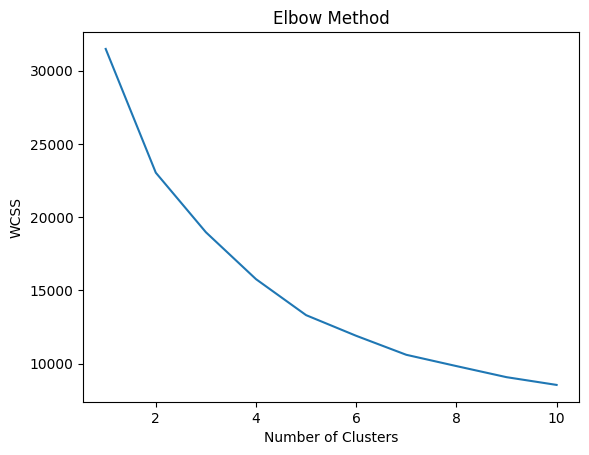

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


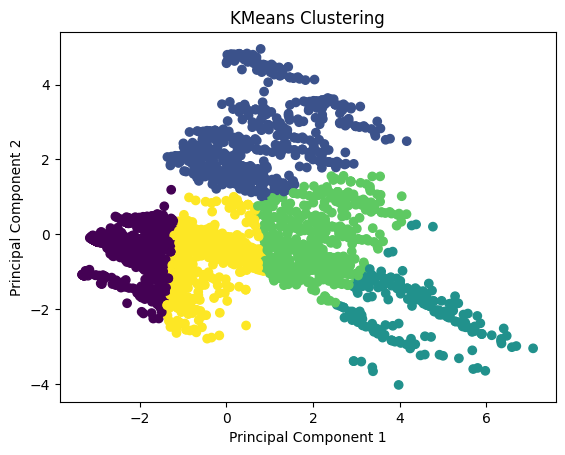

Silhouette Coefficient: 0.4280692223307742
Calinski Harabasz Score: 3615.14385802947
Davies Bouldin Score: 0.7589919291895995


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Select features for clustering
df_selected = df[['Call Failure','Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Status', 'Customer Value']]

# # Perform dimensionality reduction with PCA
# pca = PCA(n_components=2)
# df_reduced = pca.fit_transform(df_selected)
# data preprocessing
# perform standardization on the data
df_selected_std = (df_selected - df_selected.mean()) / df_selected.std()

# dimensionality reduction using PCA
pca = PCA(n_components=2)
df_selected_pca = pca.fit_transform(df_selected_std)

# find optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_selected_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df_selected_pca)
labels = kmeans.predict(df_selected_pca)

# plot the clusters
plt.scatter(df_selected_pca[:,0], df_selected_pca[:,1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.show()

# compute clustering performance metrics
silhouette_coefficient = silhouette_score(df_selected_pca, labels)
ch_score = calinski_harabasz_score(df_selected_pca, labels)
db_score = davies_bouldin_score(df_selected_pca, labels)

# print the clustering performance metrics
print('Silhouette Coefficient:', silhouette_coefficient)
print('Calinski Harabasz Score:', ch_score)
print('Davies Bouldin Score:', db_score)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

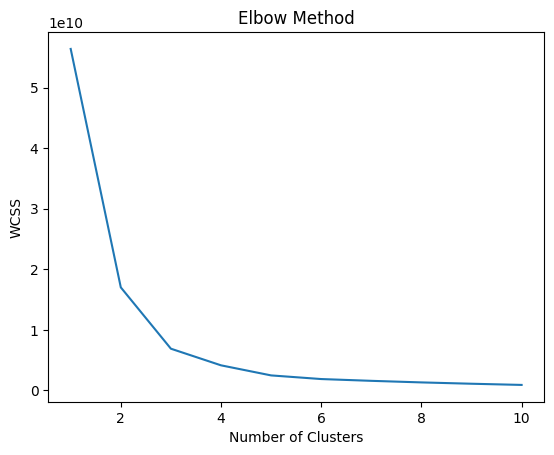

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


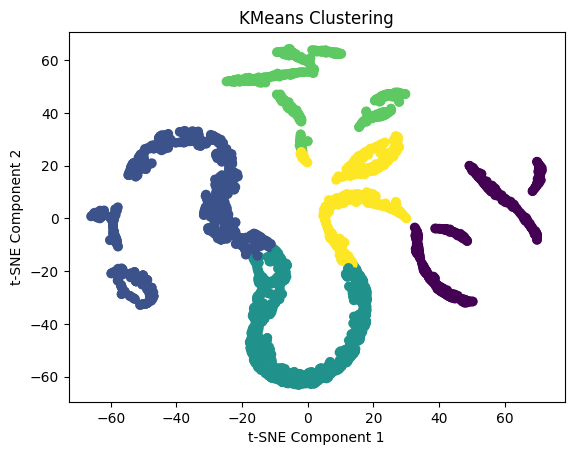

Silhouette Coefficient: 0.43756288
Calinski Harabasz Score: 3161.041622185456
Davies Bouldin Score: 0.788402200351535


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Select features for clustering
df_selected = df[['Call Failure','Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Status', 'Customer Value']]

# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_selected)

# find optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_selected)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df_reduced)
labels = kmeans.predict(df_reduced)

# plot the clusters
plt.scatter(df_reduced[:,0], df_reduced[:,1], c=labels, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('KMeans Clustering')
plt.show()

# compute clustering performance metrics
silhouette_coefficient = silhouette_score(df_reduced, labels)
ch_score = calinski_harabasz_score(df_reduced, labels)
db_score = davies_bouldin_score(df_reduced, labels)

# print the clustering performance metrics
print('Silhouette Coefficient:', silhouette_coefficient)
print('Calinski Harabasz Score:', ch_score)
print('Davies Bouldin Score:', db_score)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

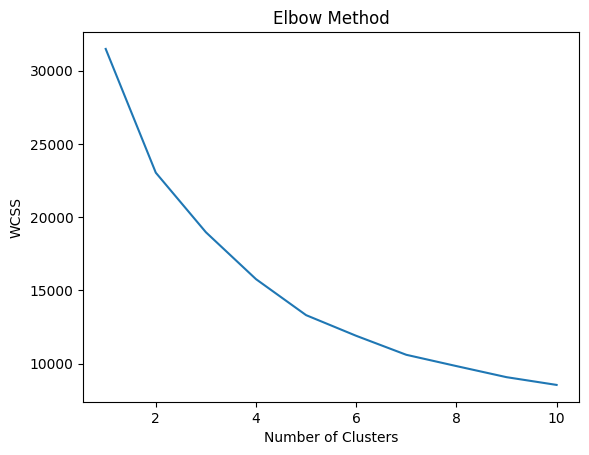

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


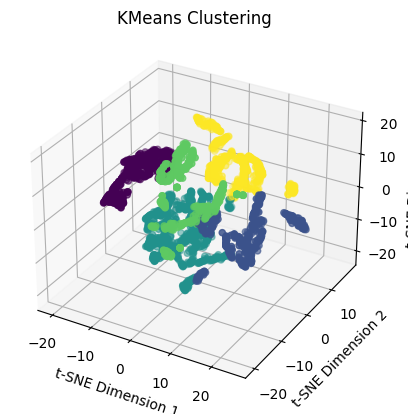

Silhouette Coefficient: 0.35433254
Calinski Harabasz Score: 1569.6625025138355
Davies Bouldin Score: 0.9632448139444107


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plots
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Select features for clustering
df_selected = df[['Call Failure','Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Status', 'Customer Value']]

# data preprocessing
# perform standardization on the data
df_selected_std = (df_selected - df_selected.mean()) / df_selected.std()

# dimensionality reduction using t-SNE with 3 dimensions
tsne = TSNE(n_components=3, random_state=42)
df_selected_tsne = tsne.fit_transform(df_selected_std)

# find optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_selected_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df_selected_tsne)
labels = kmeans.predict(df_selected_tsne)

# plot the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_selected_tsne[:,0], df_selected_tsne[:,1], df_selected_tsne[:,2], c=labels, cmap='viridis')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('KMeans Clustering')
plt.show()

# compute clustering performance metrics
silhouette_coefficient = silhouette_score(df_selected_tsne, labels)
ch_score = calinski_harabasz_score(df_selected_tsne, labels)
db_score = davies_bouldin_score(df_selected_tsne, labels)

# print the clustering performance metrics
print('Silhouette Coefficient:', silhouette_coefficient)
print('Calinski Harabasz Score:', ch_score)
print('Davies Bouldin Score:', db_score)
